In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline

In [22]:
df = pd.read_csv("tips.csv")
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [23]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_file(output_file="tips.html")

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
df.count()

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

# 5 number summary of total bill

In [4]:
df_min = df.total_bill.min()
print(f"Min value of total bill is: {df_min}")

Min value of total bill is: 3.07


In [5]:
df_max = df.total_bill.max()
print(f"Max value of total bill is: {df_max}")

Max value of total bill is: 50.81


In [6]:
quartiles1 = np.percentile(df.total_bill,[25,50,75])
print(f"Quartile 1: {quartiles1[0]:.2f}")
print(f"Quartile 2: {quartiles1[1]:.2f}")
print(f"Quartile 3: {quartiles1[2]:.2f}")

Quartile 1: 13.35
Quartile 2: 17.80
Quartile 3: 24.13


# 5 number summary of tips

In [7]:
df_min = df.tip.min()
print(f"Min value of tip is: {df_min}")

Min value of tip is: 1.0


In [8]:
df_max = df.tip.max()
print(f"Max value of tip is: {df_max}")

Max value of tip is: 10.0


In [9]:
quartiles2 = np.percentile(df.tip,[25,50,75])
print(f"Quartile 1: {quartiles2[0]:.2f}")
print(f"Quartile 2: {quartiles2[1]:.2f}")
print(f"Quartile 3: {quartiles2[2]:.2f}")

Quartile 1: 2.00
Quartile 2: 2.90
Quartile 3: 3.56


# Box Plot of total bill and tip

<AxesSubplot:xlabel='total_bill'>

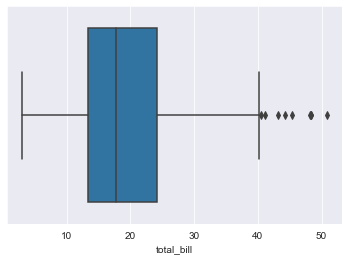

In [10]:
sns.set_style(style="darkgrid")
sns.boxplot(x=df["total_bill"],data=df)
# the box plot of total bill is right skewed

<AxesSubplot:xlabel='tip'>

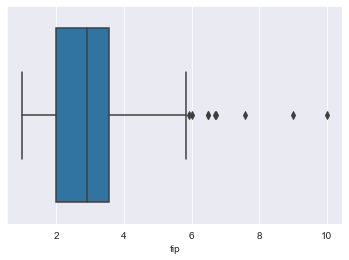

In [11]:
sns.boxplot(x=df["tip"],data=df)
# the box plot of tip is left skewed

# IQR

In [12]:
# IQR of total bill :
TB = st.iqr(df.total_bill)
print(f"IQR of total bill: {TB:.2f}")

IQR of total bill: 10.78


In [13]:
# IQR of tip :
TP = st.iqr(df.tip)
print(f"IQR of tip: {TP:.2f}")

IQR of tip: 1.56


# Outliers

In [14]:
# Outliers of total bill are
lower = quartiles1[0]-(1.5 * TB)
upper = quartiles1[2]+(1.5 * TB)
print(f"Outliers of total bill are before {lower:.2f} and after {upper:.2f} range.")

Outliers of total bill are before -2.82 and after 40.30 range.


In [15]:
# Outliers of tip are
lower = quartiles2[0]-(1.5 * TP)
upper = quartiles2[2]+(1.5 * TP)
print(f"Outliers of tip are before {lower:.2f} and after {upper:.2f} range.")

Outliers of tip are before -0.34 and after 5.91 range.


The data is right skewed.


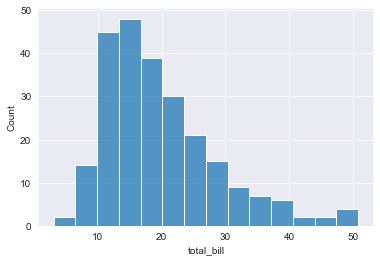

In [18]:
sns.histplot(data=df,x=df["total_bill"])
print(f"The data is right skewed.")

The data is right skewed.


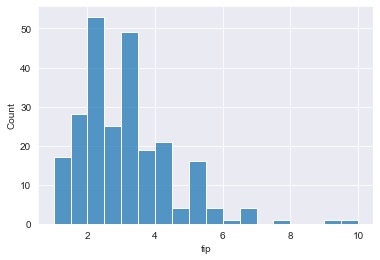

In [19]:
sns.histplot(data=df,x=df["tip"])
print(f"The data is right skewed.")

# Cumulative Frequency Polygon for "Total Bill" and "Tip"

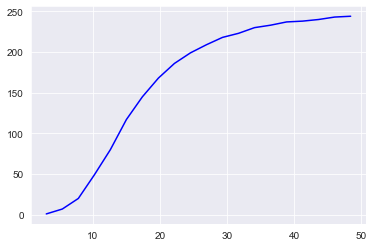

In [32]:
val1 , base = np.histogram(df["total_bill"],bins=20)
cumtb = np.cumsum(val1)
plt.plot(base[:-1],cumtb, c='b')                               
plt.show()

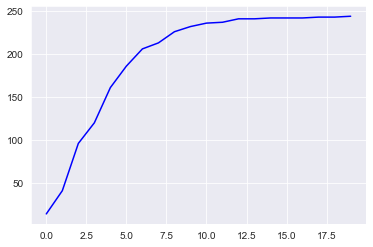

In [31]:
val2 , base = np.histogram(df["tip"],bins=20)
cumt = np.cumsum(val2)
plt.plot(cumt, c='b')                  
plt.show()

# Frequency Table and Bar Chart

## Size

col_0  Frequency
a              4
b            156
c             38
d             37
e              5
f              4


<AxesSubplot:ylabel='Frequency'>

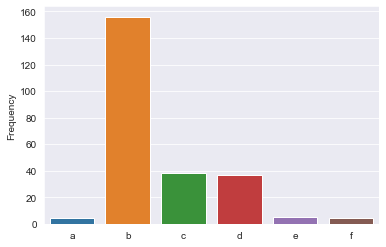

In [35]:
freq = pd.crosstab(index=df["size"],columns="Frequency")
freq.index=["a","b","c","d","e","f"]
print(freq)
sns.barplot(x=freq.index , y="Frequency",data=freq ) 

# Frequency Tables

## "Size" vs "Tip"

In [39]:
freq = pd.crosstab(index=df["size"], columns=df["tip"], margins=True)
freq.head()

tip,1.0,1.01,1.1,1.17,1.25,1.32,1.36,1.44,1.45,1.47,...,5.85,5.92,6.0,6.5,6.7,6.73,7.58,9.0,10.0,All
size,,,,,,,,,,,,,,,,,,,,,
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,2,1,1,1,3,1,0,2,1,1,...,1,0,0,0,0,0,0,0,0,156
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,38
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,0,37
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


## "Size" vs "Total bill"

In [41]:
freq2 = pd.crosstab(index=df["size"], columns=df["total_bill"],margins=True)
freq2.head()

total_bill,3.07,5.75,7.25,7.51,7.56,7.74,8.35,8.51,8.52,8.58,...,40.55,41.19,43.11,44.3,45.35,48.17,48.27,48.33,50.81,All
size,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4
2,0,1,1,1,1,1,1,1,1,0,...,1,0,0,0,0,0,0,0,0,156
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,38
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,37
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,5


# Dependency

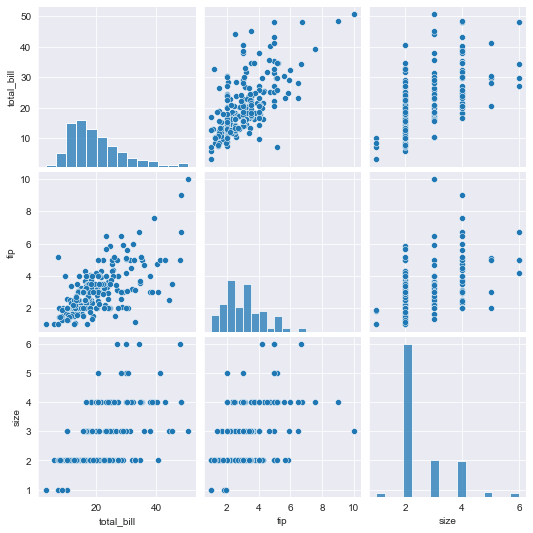

In [43]:
sns.pairplot(data=df)

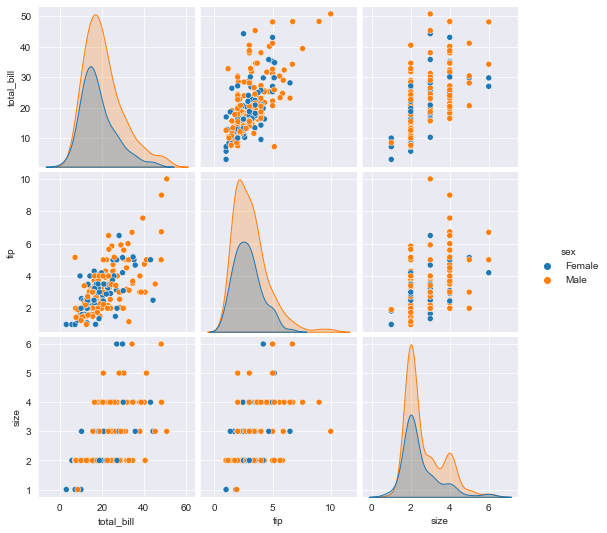

In [46]:
sns.pairplot(data=df, hue="sex")

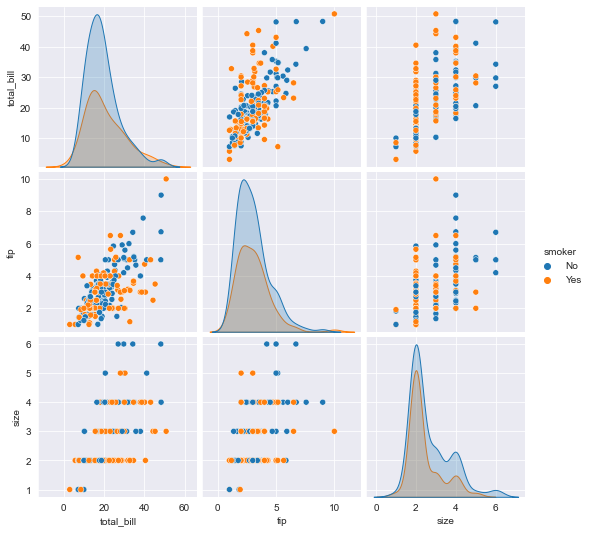

In [48]:
sns.pairplot(data=df, hue="smoker")

<AxesSubplot:>

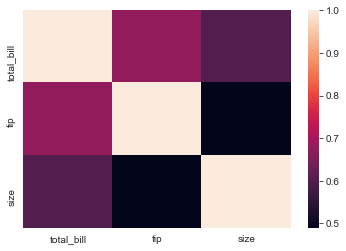

In [52]:
sns.heatmap(df.corr())